In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train = ImageDataGenerator(rescale=1/255, validation_split=0.2)
validation = ImageDataGenerator(rescale=1/255)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_dataset = train_datagen.flow_from_directory(
r"C:\Users\HP\Downloads\plantvillage\PlantVillage\train",
    target_size=(300, 300),
    batch_size=150,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

validation_dataset = validation_datagen.flow_from_directory(
    r"C:\Users\HP\Downloads\plantvillage\PlantVillage\train",
    target_size=(300, 300),
    batch_size=150,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=False
)

Found 34771 images belonging to 38 classes.
Found 8673 images belonging to 38 classes.


In [4]:
class_names = train_dataset.class_indices
print("Class Indices:", class_names)

Class Indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_bligh

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation accuracy
    patience=5,             # Number of epochs with no improvement after which training will be stopped
    verbose=1,               # Verbosity mode
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_fit = model.fit(train_dataset,
                      steps_per_epoch=250,
                      epochs=10,
                      validation_data=validation_dataset,
                      validation_steps=validation_dataset.samples,
                      callbacks=[early_stopping])

Epoch 1/10


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


232/250 ━━━━━━━━━━━━━━━━━━━━ 1:20 4s/step - accuracy: 0.4358 - loss: 2.5016

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1110s 4s/step - accuracy: 0.4484 - loss: 2.4287 - val_accuracy: 0.7745 - val_loss: 0.7299
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1088s 4s/step - accuracy: 0.8149 - loss: 0.6011 - val_accuracy: 0.8526 - val_loss: 0.4682
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2038s 8s/step - accuracy: 0.8714 - loss: 0.3996 - val_accuracy: 0.8588 - val_loss: 0.4368
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1030s 4s/step - accuracy: 0.9064 - loss: 0.2943 - val_accuracy: 0.8795 - val_loss: 0.3744
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1021s 4s/step - accuracy: 0.9198 - loss: 0.2450 - val_accuracy: 0.8944 - val_loss: 0.3226
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4758s 19s/step - accuracy: 0.9400 - loss: 0.1866 - val_accuracy: 0.9088 - val_loss: 0.2827
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1821s 7s/step - accuracy: 0.9461 - loss: 0.1649 - val_accuracy: 0.8831 - val_loss: 0.4020
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1291s 5s/step - accuracy: 0.9537 - loss: 0.1397 - val_accura

In [40]:
# Save the model in native Keras format
model.save(r'C:\Users\HP\Downloads\plantvillage\PlantVillage\saved_models\plant_disease_model.keras')

In [41]:
import matplotlib.pyplot as plt
import os

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


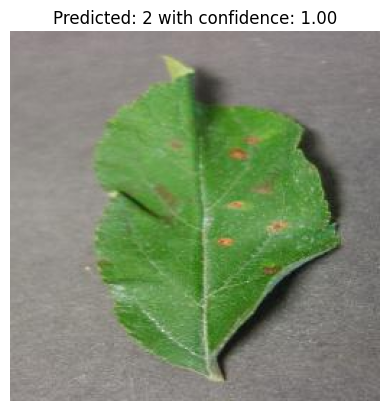

Predicted class: Apple___Cedar_apple_rust
Predicted class: 2
Confidence: 1.00
This image most likely belongs to class 2 with a 99.58% confidence.


In [42]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(300, 300,3))  # Ensure the image is resized
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255  # Rescale the image
    return img

def predict_image(img_path, model, class_names):
    img = preprocess_image(img_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])

    original_img = image.load_img(r"C:\Users\HP\Downloads\plantvillage\PlantVillage\val\Apple___Cedar_apple_rust\69561ee3-9a1f-42cd-a2fc-f3f06102747c___FREC_C.Rust 0190.JPG")
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class} with confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()
    
    class_name = os.path.basename(os.path.dirname(img_path))  # Extract class name from path
    #print(f"Image: {img_path}")
    print(f"Predicted class: {class_name}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print(f"This image most likely belongs to class {predicted_class} with a {100 * confidence:.2f}% confidence.")


img_path = r"C:\Users\HP\Downloads\plantvillage\PlantVillage\val\Apple___Cedar_apple_rust\69561ee3-9a1f-42cd-a2fc-f3f06102747c___FREC_C.Rust 0190.JPG"
predict_image(img_path, model, class_names)